## Pre-processing and Training Data Development
This is the forth step in the Data Science Method. In this exercise, you will build the data inorder to fit models
**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
  * Outliers
 
3.   Exploratory Data Analysis 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   **Modeling**
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import category_encoders as ce
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split

%matplotlib inline

### Load clean data from previous step

Also check data type and sync it based on analysis on previous step

<img src = 'figure/Data_desc.png'>

<img src = 'figure/Data_desc_cat.png'>

In [2]:
filename = 'data/clean_data2.csv'
df = pd.read_csv(filename)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,-1.0,0,-1.0,1,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
#DataFrame dtype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11233 entries, 0 to 11232
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11233 non-null  int64  
 1   Administrative_Duration  11233 non-null  float64
 2   Informational            11233 non-null  int64  
 3   Informational_Duration   11233 non-null  float64
 4   ProductRelated           11233 non-null  int64  
 5   ProductRelated_Duration  11233 non-null  float64
 6   BounceRates              11233 non-null  float64
 7   ExitRates                11233 non-null  float64
 8   PageValues               11233 non-null  float64
 9   SpecialDay               11233 non-null  float64
 10  Month                    11233 non-null  object 
 11  OperatingSystems         11233 non-null  int64  
 12  Browser                  11233 non-null  int64  
 13  Region                   11233 non-null  int64  
 14  TrafficType           

## Dealing with Categorical Variables

In [4]:
cat_name = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType','VisitorType']
print(cat_name)

['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']


In [5]:
for i in cat_name:
    print(i, df[i].nunique())
    print(df[i].value_counts())

Month 10
May     3166
Nov     2524
Mar     1790
Dec     1597
Oct      507
Sep      412
Aug      398
Jul      398
June     262
Feb      179
Name: Month, dtype: int64
OperatingSystems 8
2    5849
1    2453
3    2389
4     439
8      73
6      18
7       6
5       6
Name: OperatingSystems, dtype: int64
Browser 13
2     7139
1     2323
4      679
5      429
6      166
10     145
8      133
3      104
13      54
7       44
12      10
11       6
9        1
Name: Browser, dtype: int64
Region 9
1    4280
3    2200
4    1090
2    1047
6     747
7     708
9     470
8     401
5     290
Name: Region, dtype: int64
TrafficType 20
2     3493
1     2160
3     1921
4     1020
13     660
6      413
10     413
8      321
5      251
11     239
20     187
9       40
7       38
15      35
19      16
14      11
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64
VisitorType 3
Returning_Visitor    9481
New_Visitor          1674
Other                  78
Name: VisitorType, dtype: int64


In [6]:
#One hot encoding
df_enc = df.copy()

for col in cat_name:
    df_enc = pd.concat([df_enc.drop(col, axis = 1),pd.get_dummies(df_enc[col],prefix = col)],axis = 1)

print(df_enc.columns)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'OperatingSystems_1', 'OperatingSystems_2',
       'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_5',
       'OperatingSystems_6', 'OperatingSystems_7', 'OperatingSystems_8',
       'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5',
       'Browser_6', 'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10',
       'Browser_11', 'Browser_12', 'Browser_13', 'Region_1', 'Region_2',
       'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8',
       'Region_9', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3',
       'TrafficType_4', 'TrafficType_5', 'TrafficType_6', '

## Dealing with Non - Categorical Variables

In [7]:
df_enc.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
count,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000,...,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000,11233.000000
mean,2.046025,70.460222,0.396421,25.018867,23.305795,796.561459,0.021643,0.043278,5.846268,0.063402,...,0.000979,0.003116,0.000267,0.000089,0.000890,0.001424,0.016647,0.149025,0.006944,0.844031
std,2.949437,152.068255,1.044749,111.308646,23.061285,796.265484,0.047070,0.047630,18.724162,0.201350,...,0.031279,0.055735,0.016341,0.009435,0.029825,0.037716,0.127952,0.356129,0.083044,0.362842
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,169.966667,0.000000,0.014286,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,3.000000,0.000000,0.000000,16.000000,528.196429,0.002222,0.026449,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,82.850000,0.000000,0.000000,32.000000,1202.750000,0.017857,0.050000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,21.000000,2156.166667,10.000000,2252.033333,179.000000,3401.300000,0.200000,0.200000,361.763742,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
non_cat_name = ['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated', 
                'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

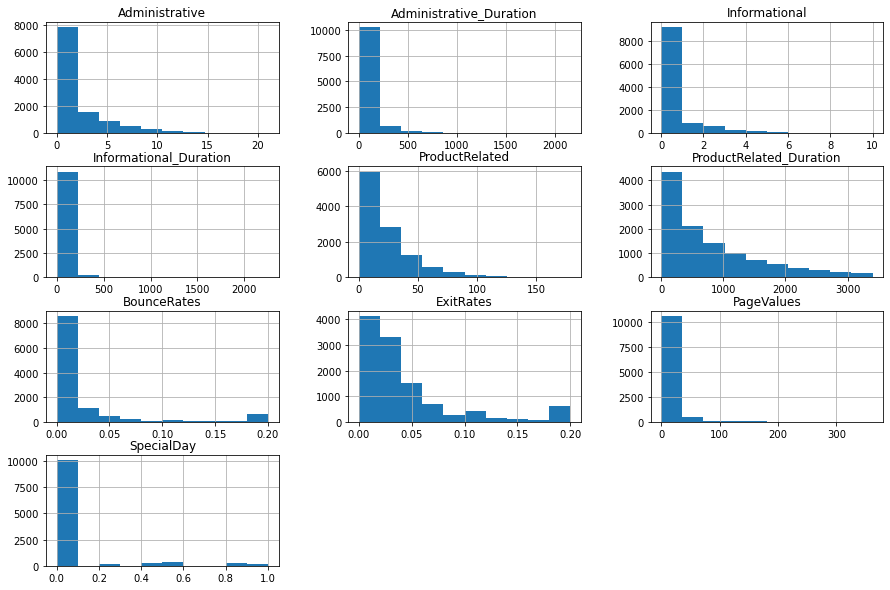

In [9]:
df_enc[non_cat_name].hist(figsize = (15,10))
plt.show()

## Standardization

In [10]:
scaler = StandardScaler()
df_enc[non_cat_name] = scaler.fit_transform(df_enc[non_cat_name])

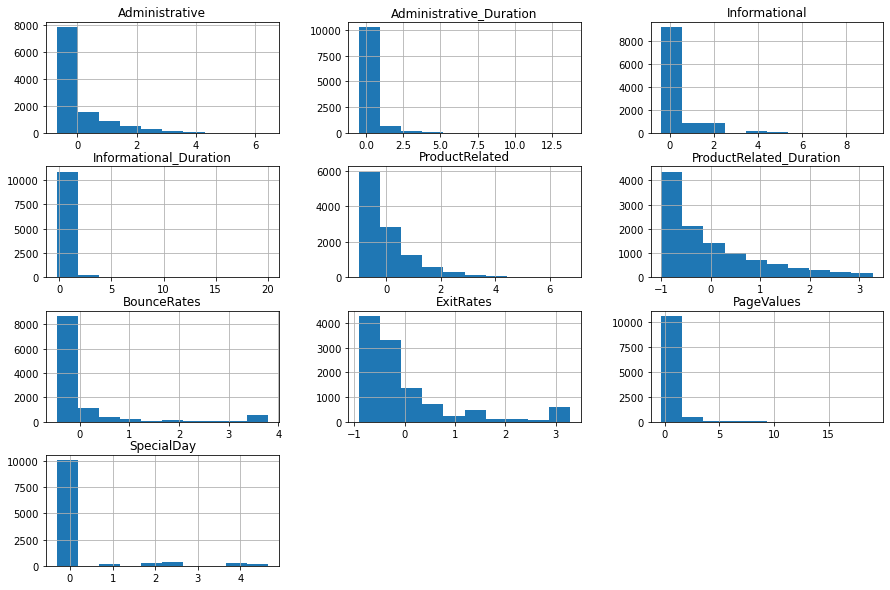

In [11]:
df_enc[non_cat_name].hist(figsize = (15,10))
plt.show()

## Feature Selection -- Statistical Test

In [12]:
#ANOVA Test
from sklearn import feature_selection

feature_sel =  pd.DataFrame()
feature_sel['Feature Name'] = non_cat_name
feature_sel['f_score'] = feature_selection.f_classif(df[non_cat_name],df['Revenue'])[0]
feature_sel['p-value'] = feature_selection.f_classif(df[non_cat_name],df['Revenue'])[1]

In [13]:
# Chi Square Test
from scipy.stats import chi2_contingency
#Testing the relationship
for i in cat_name:
    chi_res = chi2_contingency(pd.crosstab(df[i], df['Revenue']))
    #print('Chi2 Statistic for {}: {}, p-value: {}'.format(i,chi_res[0], chi_res[1]))
    feature_sel = feature_sel.append({'Feature Name': i,'f_score':chi_res[0],'p-value':chi_res[1]}, ignore_index=True)

In [14]:
feature_sel.sort_values(by = 'f_score',ascending = 0)

,Feature Name,f_score,p-value
8,PageValues,4231.425465,0.000000e+00
7,ExitRates,468.200645,9.295180e-102
14,TrafficType,337.953441,3.137122e-60
5,ProductRelated_Duration,284.750779,4.136469e-63
6,BounceRates,237.856340,4.036474e-53
10,Month,233.140055,3.587673e-45
4,ProductRelated,181.682179,4.338301e-41
15,VisitorType,169.216537,1.799268e-37
0,Administrative,148.684988,5.509279e-34
1,Administrative_Duration,77.358503,1.633531e-18


In [15]:
selected_features = ['PageValues','ExitRates','TrafficType_1', 'TrafficType_2', 'TrafficType_3',
       'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7',
       'TrafficType_8', 'TrafficType_9', 'TrafficType_10', 'TrafficType_11',
       'TrafficType_12', 'TrafficType_13', 'TrafficType_14', 'TrafficType_15',
       'TrafficType_16', 'TrafficType_17', 'TrafficType_18', 'TrafficType_19',
       'TrafficType_20','ProductRelated_Duration','BounceRates','Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep','ProductRelated','VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor','Administrative']

In [16]:
X = df_enc.drop(['Revenue'],axis=1)
y = df_enc['Revenue']

X_ss, X_val, y_ss, y_val  = train_test_split(X, y, test_size=0.1, random_state=43,shuffle = True)

y_ss = y_ss.ravel()
X_ss = X_ss.reset_index().drop('index',axis = 1)

In [17]:
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight('balanced', np.unique(y_ss), y_ss)
print(np.unique(y_ss),weights)

[False  True] [0.58399769 3.47627235]


C:\Users\sanja\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[False  True], y=[False False False ... False False False] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


## Modeling

Methods used to deal with imbalance in data set:

1. Adding class-weight
2. Under Samoling using NearMiss
3. Over Sampling using SMOTE

Tried all this methods to pick optimal model

In [18]:
from imblearn.under_sampling import NearMiss 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from statistics import *

nm = NearMiss()
sm = SMOTE(random_state=27, sampling_strategy=1.0)


def cross_val(model,X,y,flag = 0,fs = 0,sf = selected_features):
    ''' Normal, flag = 0, Undersampling, flag = -1, Oversampling, flag = 1''' 
    if fs == 1:
        print('Features selected')
        try:
            X = X[sf]
        except:
            X = X[['PageValues','ExitRates','TrafficType_1', 'TrafficType_2', 'TrafficType_3','TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7',
       'TrafficType_8', 'TrafficType_9', 'TrafficType_10', 'TrafficType_11','TrafficType_12', 'TrafficType_13', 'TrafficType_14', 'TrafficType_15',
       'TrafficType_16', 'TrafficType_17', 'TrafficType_18', 'TrafficType_19','TrafficType_20','ProductRelated_Duration','Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct','Month_Sep','ProductRelated','VisitorType_New_Visitor', 'VisitorType_Other','VisitorType_Returning_Visitor','Administrative']]
            
    else:
        print('Features not selected')
    f1_scr = []
    
    skf = StratifiedKFold(n_splits=3, random_state=None,shuffle = True)
    for train, test in skf.split(X,y): ## you must do this on full dataset 
        X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=43,shuffle = True)

        if flag == -1: #Undersampling
            X_tr, y_tr = nm.fit_resample(X_train, y_train)

        elif flag == 1: #Oversampling
            X_tr, y_tr = sm.fit_resample(X_train, y_train)

        else:
            X_tr = X_train
            y_tr = y_train

        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        f1_scr.append(f1)
    print('F1 Score',mean(f1_scr))
                    
    return model

In [19]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter = 1000,class_weight={True:3.5,False:0.6})
print('Normal')
logreg_nfs = cross_val(logreg,X_ss.drop('BounceRates',axis = 1),y_ss,0,0)
logreg_fs = cross_val(logreg,X_ss.drop('BounceRates',axis = 1),y_ss,0,1)

logreg = LogisticRegression(max_iter = 1000)
print('Under Sample')
logreg_nfs_ds = cross_val(logreg,X_ss.drop('BounceRates',axis = 1),y_ss,-1,0)
logreg_fs_ds = cross_val(logreg,X_ss.drop('BounceRates',axis = 1),y_ss,-1,1)
print('Over Sample')
logreg_nfs_us = cross_val(logreg,X_ss.drop('BounceRates',axis = 1),y_ss,1,0)
logreg_fs_us = cross_val(logreg,X_ss.drop('BounceRates',axis = 1),y_ss,1,1)

Normal
Features not selected
F1 Score 0.6349496797804208
Features selected
F1 Score 0.6373626373626373
Under Sample
Features not selected
F1 Score 0.41293800539083564
Features selected
F1 Score 0.47973856209150323
Over Sample
Features not selected
F1 Score 0.6088117489986649
Features selected
F1 Score 0.6256109481915932


In [20]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(class_weight={True:3.5,False:0.6})
print('Normal')
clf_nfs = cross_val(clf,X_ss,y_ss,0,0)
clf_fs = cross_val(clf,X_ss,y_ss,0,1)

clf = tree.DecisionTreeClassifier()
print('Under Sample')
clf_nfs_ds = cross_val(clf,X_ss,y_ss,-1,0)
clf_fs_ds = cross_val(clf,X_ss,y_ss,-1,1)
print('Over Sample')
clf_nfs_us = cross_val(clf,X_ss,y_ss,1,0)
clf_fs_us = cross_val(clf,X_ss,y_ss,1,1)

Normal
Features not selected
F1 Score 0.5792249273527041
Features selected
F1 Score 0.584940676308102
Under Sample
Features not selected
F1 Score 0.39706980190406954
Features selected
F1 Score 0.4223036988471606
Over Sample
Features not selected
F1 Score 0.5766291694801545
Features selected
F1 Score 0.584306917337518


In [21]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(class_weight={True:3.6,False:0.6})
print('Normal')
rfc_nfs = cross_val(rfc,X_ss,y_ss,0,0)
rfc_fs = cross_val(rfc,X_ss,y_ss,0,1)

rfc = RandomForestClassifier()
print('Under Sample')
rfc_nfs_ds = cross_val(rfc,X_ss,y_ss,-1,0)
rfc_fs_ds = cross_val(rfc,X_ss,y_ss,-1,1)
print('Over Sample')
rfc_nfs_us = cross_val(rfc,X_ss,y_ss,1,0)
rfc_fs_us = cross_val(rfc,X_ss,y_ss,1,1)

Normal
Features not selected
F1 Score 0.6479663628788337
Features selected
F1 Score 0.6720568737584516
Under Sample
Features not selected
F1 Score 0.46852419386282995
Features selected
F1 Score 0.44663556489303097
Over Sample
Features not selected
F1 Score 0.6990797654489349
Features selected
F1 Score 0.696304320153024


In [22]:
from xgboost import XGBClassifier

gbc = XGBClassifier(scale_pos_weight=17)
print('Normal')
gbc_nfs = cross_val(gbc,X_ss,y_ss,0,0)
gbc_fs = cross_val(gbc,X_ss,y_ss,0,1)

gbc = XGBClassifier()
print('Under Sample')
gbc_nfs_ds = cross_val(gbc,X_ss,y_ss,-1,0)
gbc_fs_ds = cross_val(gbc,X_ss,y_ss,-1,1)
print('Over Sample')
gbc_nfs_us = cross_val(gbc,X_ss,y_ss,1,0)
gbc_fs_us = cross_val(gbc,X_ss,y_ss,1,1)

Normal
Features not selected
F1 Score 0.686070686070686
Features selected
F1 Score 0.6534653465346535
Under Sample
Features not selected
F1 Score 0.4710144927536232
Features selected
F1 Score 0.49870466321243523
Over Sample
Features not selected
F1 Score 0.6728971962616823
Features selected
F1 Score 0.6755555555555556


In [23]:
from sklearn.svm import SVC

svc = SVC(class_weight={True:3.5,False:0.6})
print('Normal')
svc_nfs = cross_val(svc,X_ss,y_ss,0,0)
svc_fs = cross_val(svc,X_ss,y_ss,0,1)

svc = SVC()
print('Under Sample')
svc_nfs_ds = cross_val(svc,X_ss,y_ss,-1,0)
svc_fs_ds = cross_val(svc,X_ss,y_ss,-1,1)
print('Over Sample')
svc_nfs_us = cross_val(svc,X_ss,y_ss,1,0)
svc_fs_us = cross_val(svc,X_ss,y_ss,1,1)

Normal
Features not selected
F1 Score 0.6897918731417245
Features selected
F1 Score 0.6749049429657794
Under Sample
Features not selected
F1 Score 0.38897396630934145
Features selected
F1 Score 0.4110032362459547
Over Sample
Features not selected
F1 Score 0.6814988290398126
Features selected
F1 Score 0.6805555555555556


UnderSampling really detiorates model performance.

SVM performs well with class-weight.

RandomForest performs well with oversampling using SMOTE.

In [24]:
def plot_features(model,feature_list= X_ss.columns):
    feature_importance = pd.DataFrame()
    feature_importance['Features'] = feature_list
    feature_importance['Feature_Importance'] = model.feature_importances_
    feature_importance.sort_values(by = 'Feature_Importance',ascending = False,inplace = True)
    feature_importance['Cumulative_Importances'] = np.cumsum(feature_importance['Feature_Importance'])

    plt.figure(figsize = [25,10])
    plt.bar(range(len(feature_list)), feature_importance['Feature_Importance'])
    plt.show()

    plt.figure(figsize = [25,10])
    plt.plot(feature_importance['Cumulative_Importances'].values, 'g-')
    plt.xticks(range(len(feature_importance['Features'])),feature_importance['Features'],rotation = 'vertical')
    plt.hlines(y = 0.95, xmin=0, xmax=len(feature_importance['Feature_Importance']), color = 'r', linestyles = 'dashed')

    plt.show()
    
    return feature_importance

In [25]:
from sklearn import metrics

def pred(model,X,y):
    y_pred = model.predict(X)
    f1 = f1_score(y, y_pred)
    print(f1)
    print(metrics.confusion_matrix(y, y_pred))
    print(metrics.classification_report(y, y_pred))

Features not selected
F1 Score 0.6992748472481962


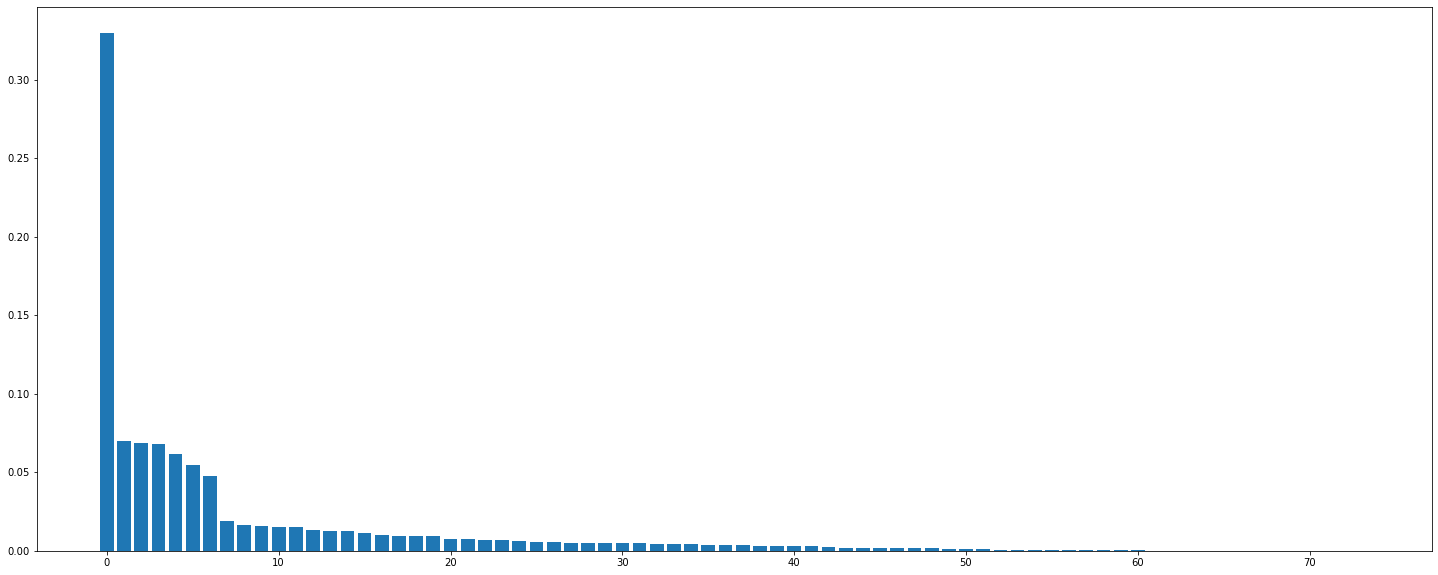

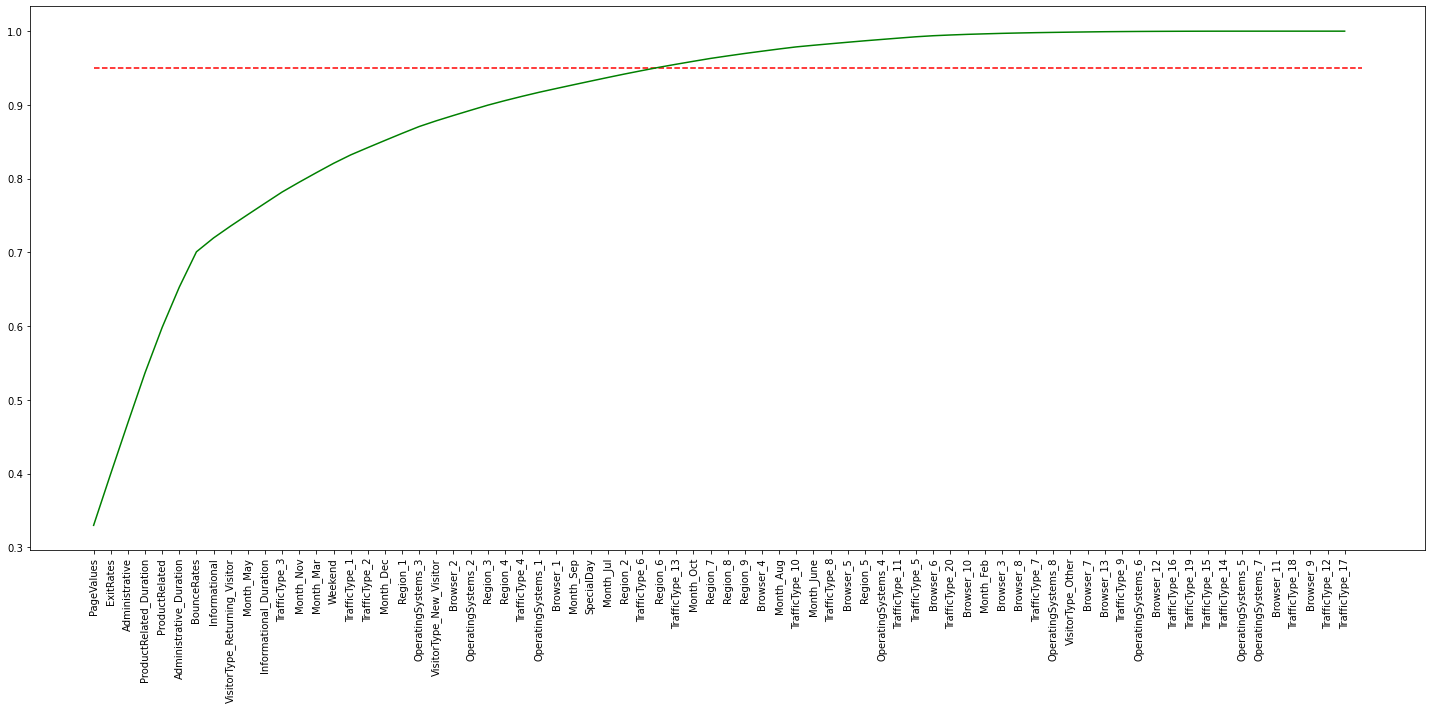

In [26]:
rfc_nfs_us = cross_val(rfc,X_ss,y_ss,1,0)
feature_importance = plot_features(rfc_nfs_us)

In [27]:
selected_features_rfc = feature_importance[feature_importance['Cumulative_Importances'] <= 0.95]['Features'].values

Features selected
F1 Score 0.6992034794365047


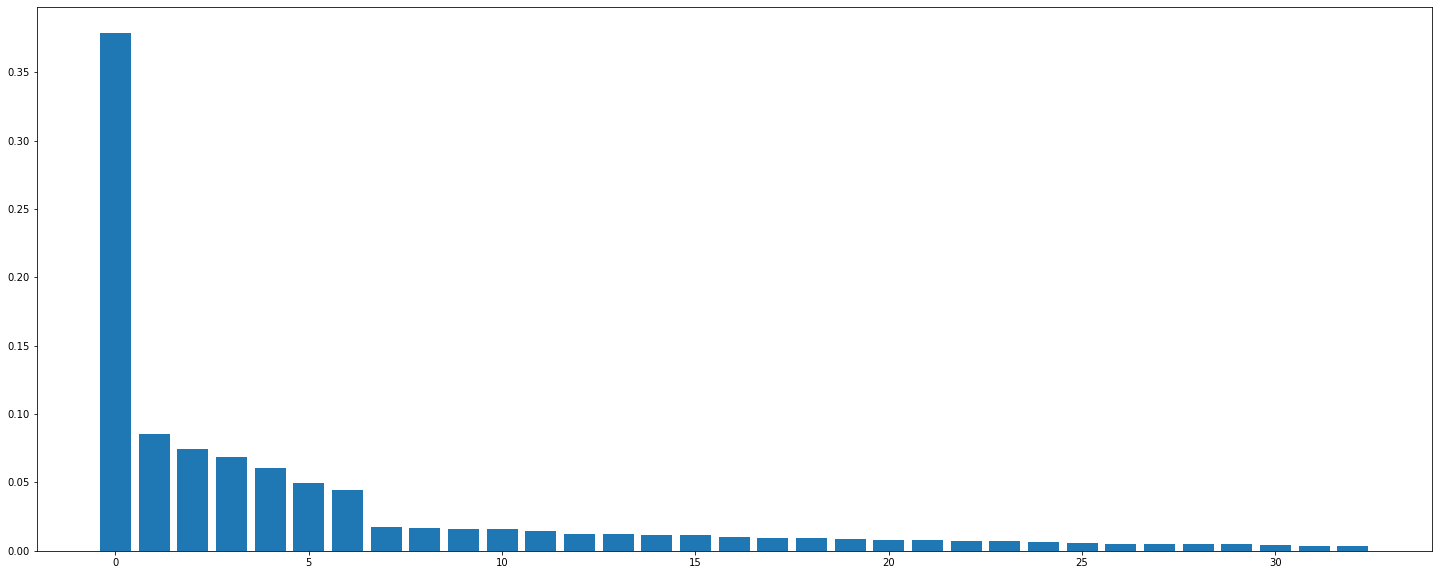

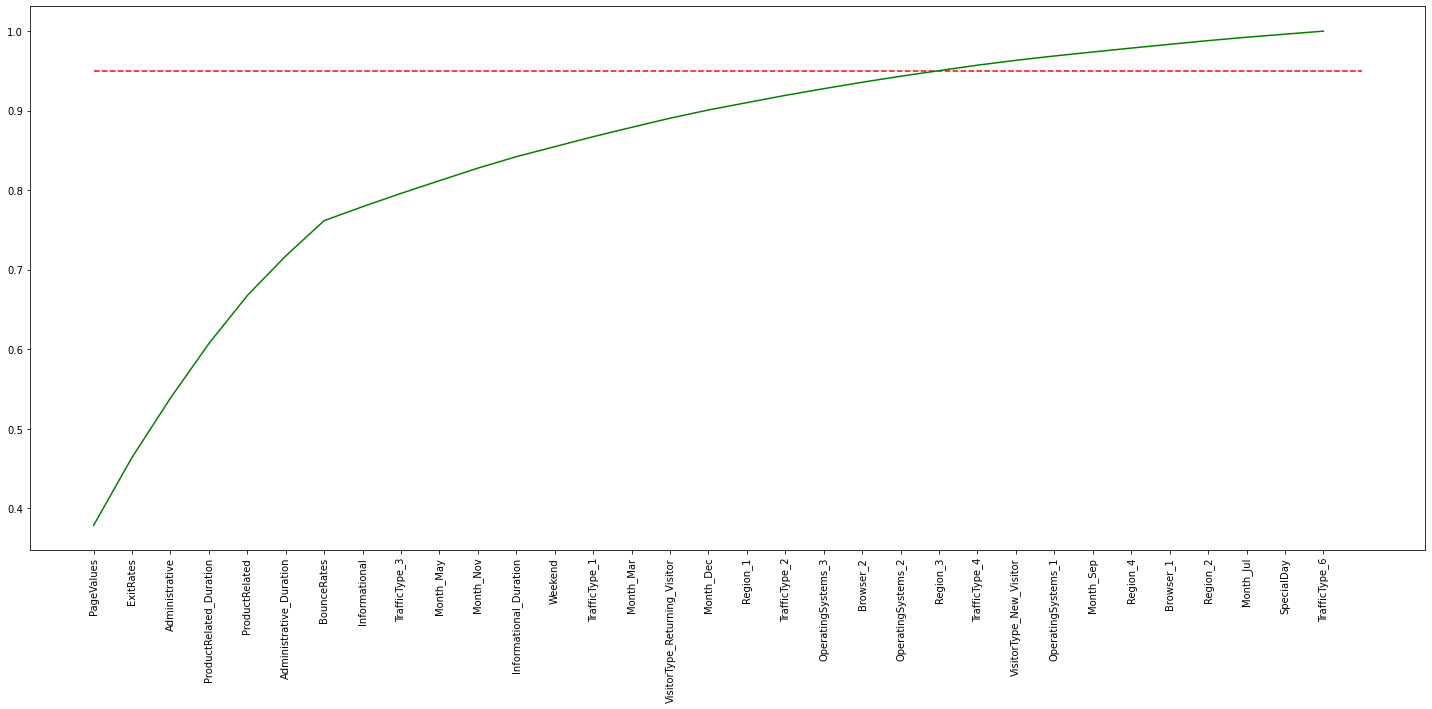

In [28]:
rfc_fs_us = cross_val(rfc,X_ss,y_ss,1,1,selected_features_rfc)
feature_importance = plot_features(rfc_nfs_us,selected_features_rfc)

In [29]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 6, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [31]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfc = RandomForestClassifier()
X_tr, y_tr = sm.fit_resample(X_ss[selected_features_rfc], y_ss)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring = 'f1')
# Fit the random search model
rf_random.fit(X_tr, y_tr)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 24.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 6, 10, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, scoring='f1', verbose=2)

In [32]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

In [33]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfc = RandomForestClassifier()
X_tr, y_tr = sm.fit_resample(X_ss[selected_features], y_ss)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random_2 = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring = 'f1')
# Fit the random search model
rf_random_2.fit(X_tr, y_tr)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 16.5min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 6, 10, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, scoring='f1', verbose=2)

In [34]:
rf_random_2.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

In [35]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}  


# Use the random grid to search for best hyperparameters
# First create the base model to tune
svc = SVC(class_weight={True:3.5,False:0.6})

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
svm_random = RandomizedSearchCV(estimator = svc, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring = 'f1')
# Fit the random search model
svm_random.fit(X_ss, y_ss)

C:\Users\sanja\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 25 is smaller than n_iter=100. Running 25 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  3.4min finished


RandomizedSearchCV(cv=3, estimator=SVC(class_weight={False: 0.6, True: 3.5}),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
                   random_state=42, scoring='f1', verbose=2)

In [36]:
svm_random.best_params_

{'gamma': 0.0001, 'C': 1000}

Random Forest and XGBoost have f1 score of 1

In [37]:
pred(rf_random,X_val[selected_features_rfc],y_val)

0.7183908045977012
[[901  62]
 [ 36 125]]
              precision    recall  f1-score   support

       False       0.96      0.94      0.95       963
        True       0.67      0.78      0.72       161

    accuracy                           0.91      1124
   macro avg       0.82      0.86      0.83      1124
weighted avg       0.92      0.91      0.92      1124



In [38]:
pred(rf_random_2,X_val[selected_features],y_val)

0.7013698630136986
[[887  76]
 [ 33 128]]
              precision    recall  f1-score   support

       False       0.96      0.92      0.94       963
        True       0.63      0.80      0.70       161

    accuracy                           0.90      1124
   macro avg       0.80      0.86      0.82      1124
weighted avg       0.92      0.90      0.91      1124



In [39]:
pred(svm_random,X_val,y_val)

0.6857142857142856
[[894  69]
 [ 41 120]]
              precision    recall  f1-score   support

       False       0.96      0.93      0.94       963
        True       0.63      0.75      0.69       161

    accuracy                           0.90      1124
   macro avg       0.80      0.84      0.81      1124
weighted avg       0.91      0.90      0.91      1124



In [40]:
selected_features_rfc

array(['PageValues', 'ExitRates', 'Administrative',
       'ProductRelated_Duration', 'ProductRelated',
       'Administrative_Duration', 'BounceRates', 'Informational',
       'VisitorType_Returning_Visitor', 'Month_May',
       'Informational_Duration', 'TrafficType_3', 'Month_Nov',
       'Month_Mar', 'Weekend', 'TrafficType_1', 'TrafficType_2',
       'Month_Dec', 'Region_1', 'OperatingSystems_3',
       'VisitorType_New_Visitor', 'Browser_2', 'OperatingSystems_2',
       'Region_3', 'Region_4', 'TrafficType_4', 'OperatingSystems_1',
       'Browser_1', 'Month_Sep', 'SpecialDay', 'Month_Jul', 'Region_2',
       'TrafficType_6'], dtype=object)

Random Forest, with Over-Sampling using SMOTE has the highest F1 score. For feature selection, picked Cumulative Importance, as a parameter to select features.

* __PageValues__ has the highest feature importance, ie. the pages visited by customer the most, popular product pages.
* __Month:__ May, Nov, March, Dec, Sep and July, are key months. Something also observed in EDA step.
* __ProductRelated_Duration and ProductRelated__, combined have a greater importance in the model.
* __Administrative and Administrative_Duration__,have higher presdence over __Informational and Informational_Duration__.
* __Returning Visitor__ has higher importance than __New Visitor__, a loyalty program might boost sales.
* __Exit Rates__ and __Bounce Rates__ also, help determine visitor loyalty.
* __Traffic Type__ 3,2,3,4 and 6 attract more visitors, who likely to purchase, these channels can be considered to push more traffic.
* __Region__ 1,3 and 2 has higher feature importance.
* Software related details also can help, __Operating System__ 3,1 and __Browser__ 2,1; considering this, a better UI experience with other OS and Browsers, can get new customers.